In [143]:
#!pip install sklearn

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [145]:
df = pd.read_csv("../data/energy_and_weather.csv",delimiter=',',encoding='UTF-8')

In [146]:
df.columns

Index(['timestamp', 'electricity_usage', 'fbh_kalte_df', 'fbh_warme_df',
       'district_heating', 'water_heating', 'vent_cooling', 'vent_heating',
       'pv_production', 'gym_heating',
       'Graz Temperature [2 m elevation corrected]',
       'Graz Shortwave Radiation', 'Graz Direct Shortwave Radiation',
       'Graz Diffuse Shortwave Radiation', 'Graz Relative Humidity [2 m]',
       'is_schoolday', 'day', 'month', 'year', 'hour'],
      dtype='object')

In [147]:
X = df[['Graz Temperature [2 m elevation corrected]',
       'Graz Shortwave Radiation', 'Graz Direct Shortwave Radiation',
       'Graz Diffuse Shortwave Radiation', 'Graz Relative Humidity [2 m]',
       'is_schoolday', 'day', 'month', 'hour']]
Y = df['electricity_usage']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Training the model

### Decision Tree Regressor

In [149]:
DecTreeReg= DecisionTreeRegressor()
DecTreeReg.fit(X_train, y_train)

DecisionTreeRegressor()

Predictions

In [150]:
DTRPred=DecTreeReg.predict(X_test)

Evaluation

In [151]:
DTRRMSE = (np.sqrt(mean_squared_error(y_test, DTRPred)))
DTRR2= r2_score(y_test, DTRPred)
DTRMAE = mean_absolute_error(y_test, DTRPred)
print("Perfomance for test set {:.2f}".format(DTRR2))

Perfomance for test set 0.82


<Figure size 640x480 with 0 Axes>

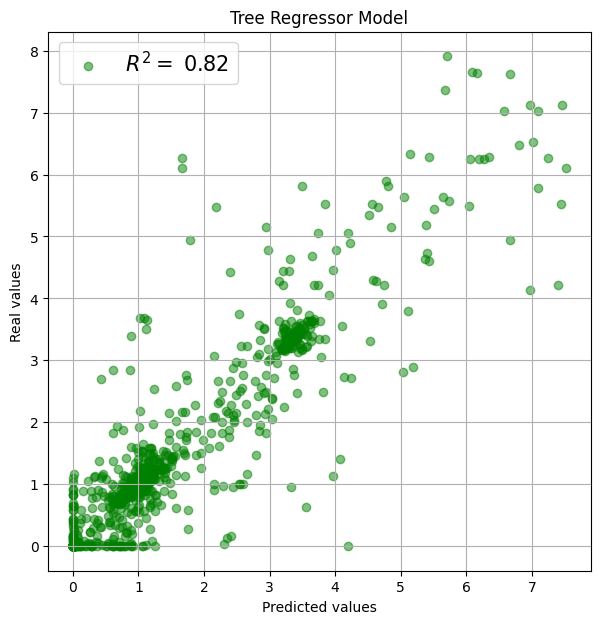

In [152]:
plt.figure()
plt.figure(figsize=(7, 7))
plt.grid()
plt.scatter(y_test,DTRPred,alpha=0.5
        ,color='green',label=r'$R^2 = $ {:.2f}'.format(DTRR2))
plt.title("Tree Regressor Model")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.legend(prop={'size': 15})
#plt.savefig("./Imgs/tree_regressor_model.png",transparent=True)
plt.show()

### MLPRegressor Model

In [153]:
MLPR= MLPRegressor()
MLPR.fit(X_train, y_train)

MLPRegressor()

In [154]:
MLPRPred=MLPR.predict(X_test)

In [155]:
MLRPRMSE = (np.sqrt(mean_squared_error(y_test, MLPRPred)))
MLPRR2= r2_score(y_test, MLPRPred)
MLPRMAE = mean_absolute_error(y_test, MLPRPred)
print(MLPRR2)

0.734774585466778


<Figure size 640x480 with 0 Axes>

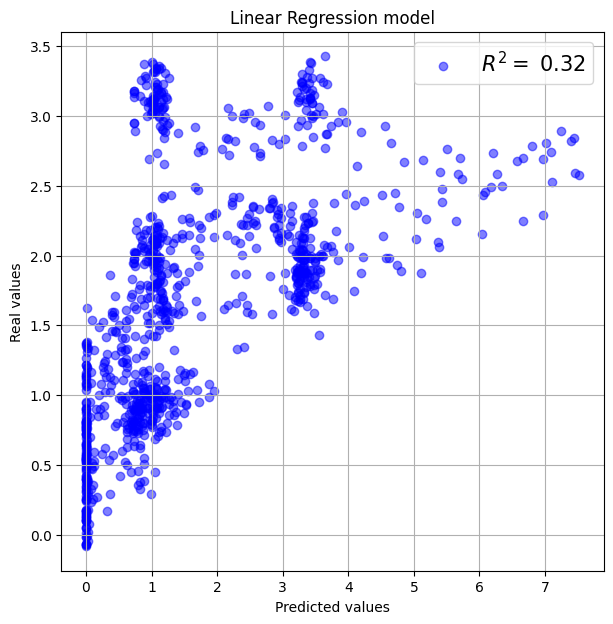

In [156]:
plt.figure()
plt.figure(figsize=(7, 7))
plt.grid()
plt.scatter(y_test,LinearPred,alpha=0.5,
            color='blue',label=r'$R^2 = $ {:.2f}'.format(LinearR2))
plt.title("Linear Regression model")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.legend(prop={'size': 15})
#plt.savefig("./Imgs/linear_regression_model.png",transparent=True)

plt.show()